# Example 1b (EX1b)


__Summary:__ In this example we stay with a resting initial condition and reference state. This state is horizontally uniform (on sigma levels) but has some temperature stratification in the vertical. So to avoid drift towards a different temperature structure due to vertical diffusion, a forcing is included to maintain the resting state identical to the initial condition. Then a forcing anomaly is added on top of this in the form of an equatorial heating. The heating is localised onto a blob on the equator and has a top-heavy amplitude profile in the vertical to mimic the heat released during deep convection. The time development of the response shows equatorial Kelvin waves propagating to the east and Rossby waves to the west. They circumnavigate the equator and meet up again about 8-9 days later.

---

### How to open and browse the model run script:

* In the left menu, browse to the `~/work/DREAM/dream_model/jobs`directory where you'll find all the scripts to run the model.
* Double-click on the script for EXAMPLE #1b: `runmodel_v8.4_EX1b.sh` to open it in an editor windows and have a look at what have changed compared to EX1a.


### How to run the model:

* Go to the terminal window.
* Go to the jobs directory: `cd  ~/work/DREAM/dream_model/jobs`
* Run the model script for EX1: `./runmodel_v8.4_EX1b.sh`

### How to produce the model outputs and diagnostics in netcdf:

* Open a second terminal window, go to the diagnostics directory: `cd ~/work/DREAM/dream_model/diagnostics/`,
* Run the diagnostics script: `./run_output.sh EX1b`.

--> The model outputs and diagnostics will be saved in `DREAM/dream_results/"+EXPID+"/netcdfs/` where `EXPID` is the name of your experiment.

---

### How to open and plot results with Python:

This notebook is based on running PYTHON in  the cells bellow. To run a cell, select it and do SHFT+ENTER or click on the "play" symbole in the top menu. To edit a cell: select it and click and edit on the text as in a text editor.

You can also read  https://jupyter-notebook.readthedocs.io/en/stable/notebook.html or 
if you need.

#### Import Python Packages

(those are already installed in the Docker container you're working in)

In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr
    
# plot
import cartopy.crs as ccrs
import cartopy.feature as ccf
import cartopy.util as ccu
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.animation as animation

import ipywidgets as widgets
from IPython.display import display, HTML, Image, clear_output



# Some customed  plot functions
import utils_SLX_plots_dream as slx


# Only if using jupyter notebook. Otherwise, comment out.
%matplotlib inline 

---

### The model outputs we are going to look at:

Your model outputs   were saved in `DREAM/dream_results/"+EXPID+"/netcdfs/` where `EXPID` is the name of your experiment (`EX1b` in our case). If you changed the name of the experiment, set `EXPID` to the name you used in the cell bellow.

In the example below, we will read outputs from the `dreamT31L15_gph_100.nc` file containing the geopotential height anomaly at 100 hPa. "anomly" means that the mean state was already substracted when saving the outputs (in the diagnostics script `model_output.sh`). 

* Set parameters:

In [2]:
EXPID="EX1b"

# local directory of input files (in the DOcker container)
diri = "/home/jovyan/work/DREAM/dream_results/"+EXPID+"/netcdfs/"

# input file
fili = "dreamT31L15_gph_250.nc"
fili2 = "dreamT31L15_u_250.nc"
fili2 = "dreamT31L15_u_250.nc"


# where to save output plots and movies
diro = "/home/jovyan/work/DREAM/dream_results/"+EXPID+"/plots/"

* Read data (with the python package xarray):

In [3]:
#read  temperature anomaly from file
zanom = xr.open_dataset(diri+fili,decode_times=True)['gph'].squeeze()
# note: .squeeze() is used to get rid of the spurious dimensions (i.e. here, level)

# number of time frames in this experiment
NTF=zanom.time.size

---
# Display basic infos

* Now that you have loaded the data from the file, you can check what it is by printing its infos:

In [4]:
# print info on the array
print(zanom)

<xarray.DataArray 'gph' (time: 41, lat: 48, lon: 96)> Size: 2MB
[188928 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 384B -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon      (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
    lev      float64 8B 0.25
  * time     (time) datetime64[ns] 328B 1900-01-01 ... 1900-01-11
Attributes:
    units:          m
    long_name:      geopotential height on sigma levels
    standard_name:  geopotential height


* Print max, min, mean values of all array

In [5]:
print(zanom.max().values)
print(zanom.mean().values)
print(zanom.min().values)

-578.0563776978879
-606.7462193648971
-610.2723167682601


# Print basic plot at time lag +10 day

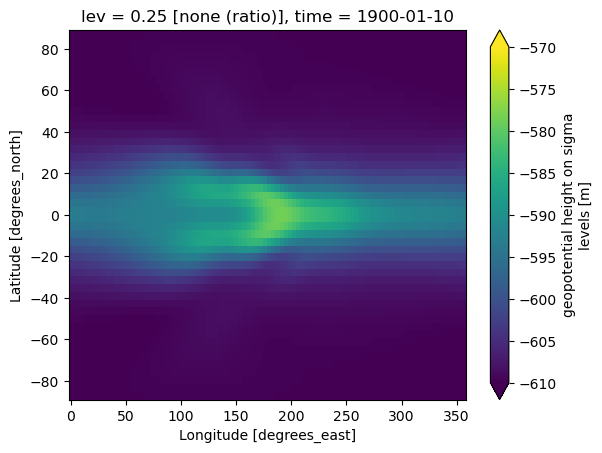

In [10]:
# time index at which select data
cdate = '1900-01-10T00:00:00'

# select data
datasubset2 = zanom.sel(time=cdate)

# plot (quick and dirty first look)
datasubset2.plot(vmin=-610,vmax=-570,extend='both',cmap='viridis')


# Plot time series at  180°,0N

Let's select the location where the heating perturbation was applied in our perturbation run (at 180°,0N):

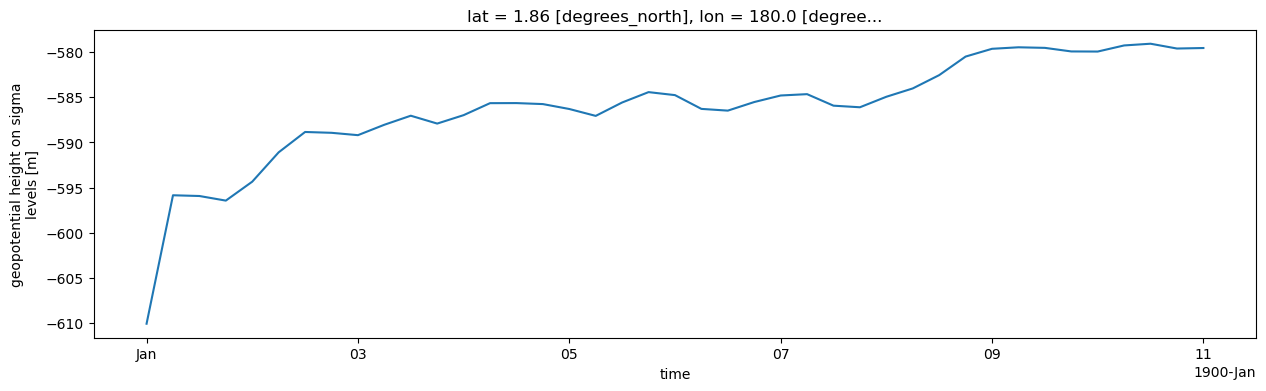

In [8]:
# select data
datasubset3 = zanom.sel(lat=0.,lon=180.,method='nearest')

# plot
fig1 = plt.figure(figsize=([15,4]),facecolor='white')        
datasubset3.plot()
plt.show()

# More fancy maps for all time frames

## Set parameters

In [19]:
#------------ geography
# Global plot? True/False
glo= True

# center longitude on:
loncentr=180.

# set coastL to True if you want coaslines
coastL=False

#------------ color shading

# type of plot (can be 'contourf', 'pcolormesh', defaut is contourf)

typlo='contourf'

# min max values on the colorscale
vmin=-650
vmax=-570

# colormap
cm_base=slx.make_NCLcolormap()

# number of color segments of the colormap
Nincr=20

# color of the values smaller than vmin
su='#EFF5FB'
# color of the values larger than vmax
so='#F8E0E0'

# colorbar label 
labelplt= "250 hPa Geopot. height ("+zanom.units+")"

# number of labels on the colorbar
Nbar=5

#------------ plot output
# plot format
pltty = ".png"


# plot resolution (dpi)
dpifig=200

# base name for output plot file
plti="Z250_"+EXPID


# Plot and save single png maps for each timeframe

Note: It will generate the plots for all the time frames but will display only the second one as an example. The next plot will animate everything.

Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0000.png


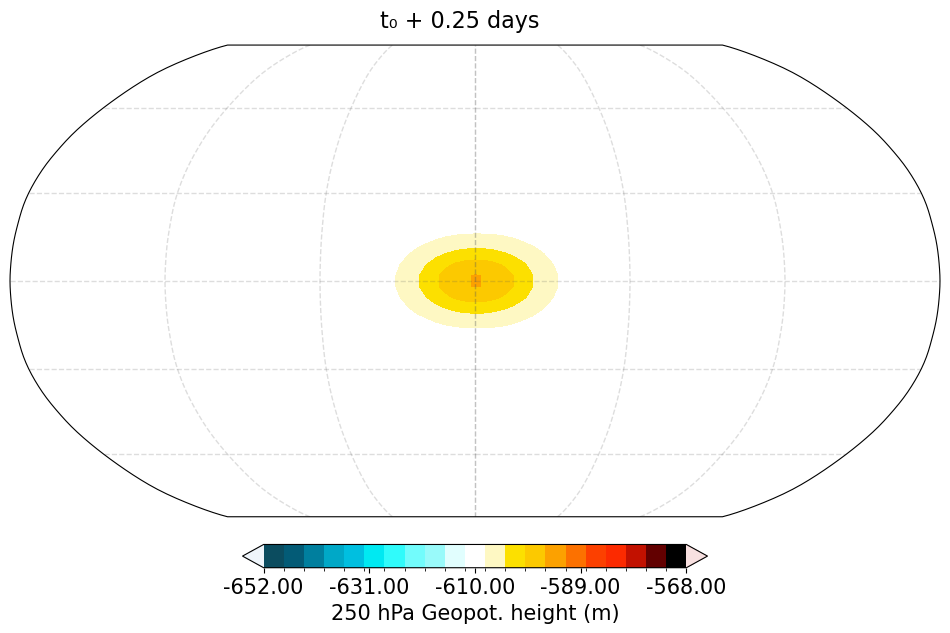

Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0001.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0002.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0003.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0004.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0005.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0006.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0007.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0008.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0009.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0010.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0011.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX1b/plots//Z250_EX1b.0012.png
Saved to ... /ho

In [20]:
# loop on all time steps in the data array:
for it in range(0,NTF):
                
            # output plot file name including the time index
            plto = plti+"."+str(it).zfill(4)

            # data to plot (must be a 2-d np.array)
            # here we select one timestep at a time for plotting purposes
            data2plot  = zanom.isel(time=it).values

            # make the data to plot cyclic so that the values at longitude 0 are repeated at 360. (for plot purposes)
            cyclic_data, cyclic_lons = ccu.add_cyclic_point(data2plot, coord=zanom.lon.values)

            #----------------------------------------------------
            #------ PLOT ----------------------------------------
            #----------------------------------------------------

            # create fig
            fig1 = plt.figure(figsize=([12,9]),facecolor='white')

            # plot data (base plot from plotmap functionn defined above)
            
            cs = slx.plotmap(fig1,cyclic_data,cyclic_lons,zanom.lat.values,plto,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,su=su,so=so,loncentr=loncentr,typlo=typlo,Nbar=Nbar,labelplt=labelplt)

            # add title on plot (date)
            #plt.title(slx.printdatestring(airanom.time.to_index(),it))
            # Compute days since t0
            t0 = zanom.time[0].values
            current_time = zanom.time[it].values
            delta_days = (np.datetime64(current_time) - np.datetime64(t0)) / np.timedelta64(1, 'D')
            title_text = fig1.text(0.5, 0.8, f"t₀ + {delta_days:.2f} days", ha='center', fontsize=16)

            if it==1:
                # display plot only once in the loop
                plt.show()
    
            # Save fig in png, resolution dpi
            fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none', dpi=dpifig,bbox_inches='tight', pad_inches=0)
            print("Saved to ... "+diro+"/"+plto+'.png')
            # close fig
            plt.close(fig1)    

#print("INITAL STATE:")
#display(Image(os.path.join(diro+"Z100_EX1b.101.png")))
#print('NOTE: All intermediate frames have been saved to '+diro)

## And you can display any of the time frames with this widget below:

In [16]:
# view figures
slider_expe = widgets.IntSlider(
    value=0,
    min=0,
    max=0+NTF-1,
    step=1,
    description='Time slider:',
    continuous_update=False
)
output_expe = widgets.Output()

def update_plot(it):
    with output_expe:
        clear_output(wait=True)
        tim = str(it).zfill(4)
        display(Image(filename=os.path.join(diro+"Z250_"+EXPID+"."+tim+".png")))

widgets.interact(update_plot, it=slider_expe)
display(output_expe)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time slider:', max=40), Output(…

Output()

__What do we see?__

Recall that a forcing anomaly was added on top of the maintained basic state in the form of an equatorial heating. The heating is localised onto a blob on the equator and has a top-heavy amplitude profile in the vertical to mimic the heat released during deep convection. The time development of the response shows equatorial Kelvin waves propagating to the east and Rossby waves to the west. They circumnavigate the equator and meet up again about 8-9 days later.

You can now go to EXAMPLE #2.